> https://towardsdatascience.com/audio-classification-using-fastai-and-on-the-fly-frequency-transforms-4dbe1b540f89

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.plotly as py
import librosa
from scipy.fftpack import fft
from sys import getsizeof
from librosa import display
%matplotlib inline

In [6]:
meta_test = pd.read_csv('./VSB_unpacked/metadata_test.csv')
meta_train = pd.read_csv('./VSB_unpacked/metadata_train.csv')
df_train = pd.read_parquet('VSB_unpacked/train.parquet')

signal0 = df_train.loc[:, '0']
signal1 = df_train.loc[:, '1']
signal2 = df_train.loc[:, '2']
signal3 = df_train.loc[:, '3']

In [7]:
x = np.linspace(0, 20, 800_000)

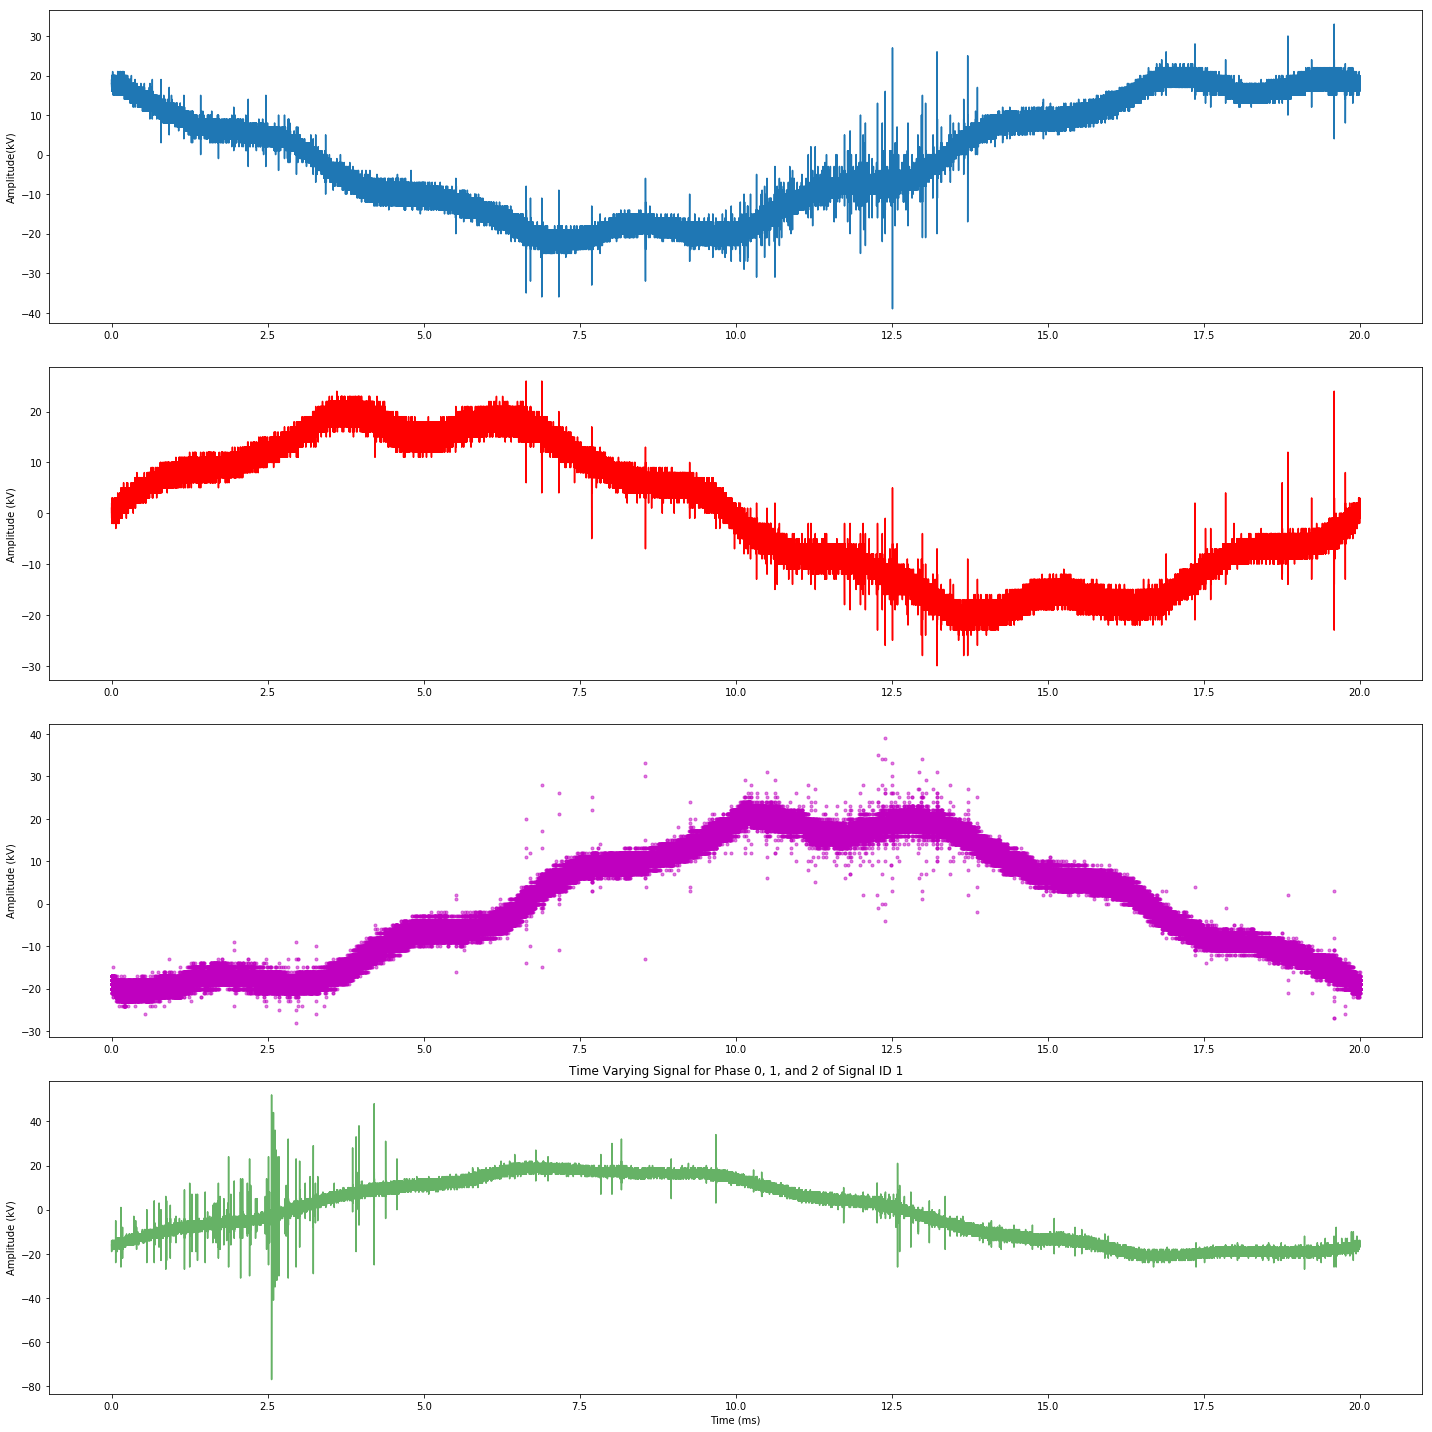

In [8]:
fig, ax = plt.subplots(4, 1, figsize=(20,20))
plt.title('Time Varying Signal for Phase 0, 1, and 2 of Signal ID 1')
ax[0].plot(x,signal0)
# ax[0].set_xlabel('Time (ms)')
ax[0].set_ylabel('Amplitude(kV)')
ax[1].plot(x,signal1,'r') 
# ax[1].set_xlabel('Time (ms)')
ax[1].set_ylabel('Amplitude (kV)')
ax[2].plot(x,signal2,'.m', alpha=.5) 
# ax[2].set_xlabel('Time (ms)')
ax[2].set_ylabel('Amplitude (kV)')
ax[3].plot(x,signal3,'g', alpha=.6) 
ax[3].set_xlabel('Time (ms)')
ax[3].set_ylabel('Amplitude (kV)')
plt.tight_layout()
plt.show();

Create FFT of signal_id 1, phase 0

In [9]:
sample_rate = (20 * 10**-3) / (800_000) # 20 millisecond duration sampled 800,000 times is 40 MHz
n_fft = 1024  # frame length 

X = fft(signal0, n_fft) # X is frequency representaion with n_fft bins
#X_mag, X_ph = librosa.magphase(X) # X broken into amplitude and phase compoennts
#X_mag_db = librosa.amplitude_to_db(X_mag) # conversion from linear to log(dB) scale

/Users/juliansweet/anaconda3/lib/python3.6/site-packages/scipy/fftpack/basic.py:153: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [8]:
X3 = fft(signal3, n_fft) # X is frequency representaion with n_fft bins
X3_mag, X3_ph = librosa.magphase(X3) # X broken into amplitude and phase compoennts
X3_mag_db = librosa.amplitude_to_db(X3_mag) # 

In [4]:
# only want (N/2) + 1 bins, rest is redundant
x=np.linspace(0,20,int(n_fft/2)+1)
Xdb = 10 * np.log10(X)

plt.plot(x, Xdb)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (a.u. log)')
plt.show();

NameError: name 'np' is not defined

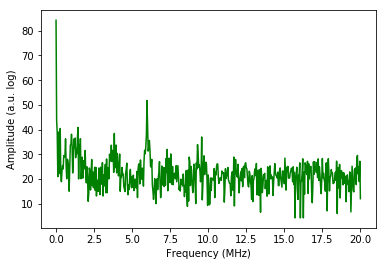

In [11]:
x=np.linspace(0,20,int(n_fft/2)+1)
plt.plot(x,X3_mag_db[:len(x)], 'g')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Amplitude (a.u. log)')
plt.show();

In [12]:
type(signal0)

pandas.core.series.Series

In [13]:
s3 = np.asarray([*map(float, signal0)])

In [14]:
s0 = np.asarray([*map(float, signal0)])

In [15]:
stft = librosa.stft(s0, n_fft=n_fft, hop_length=512)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)

In [17]:
stft = librosa.stft(s3, n_fft=n_fft, hop_length=512)
stft_magnitude, stft_phase = librosa.magphase(stft)
stft_magnitude_db = librosa.amplitude_to_db(stft_magnitude)

In [85]:
stft_magnitude_db.shape

(513, 1563)

In [84]:
stft_magnitude_db[5,5]

15.669475

Text(0.5, 1.0, 'Log-frequency power spectrogram')

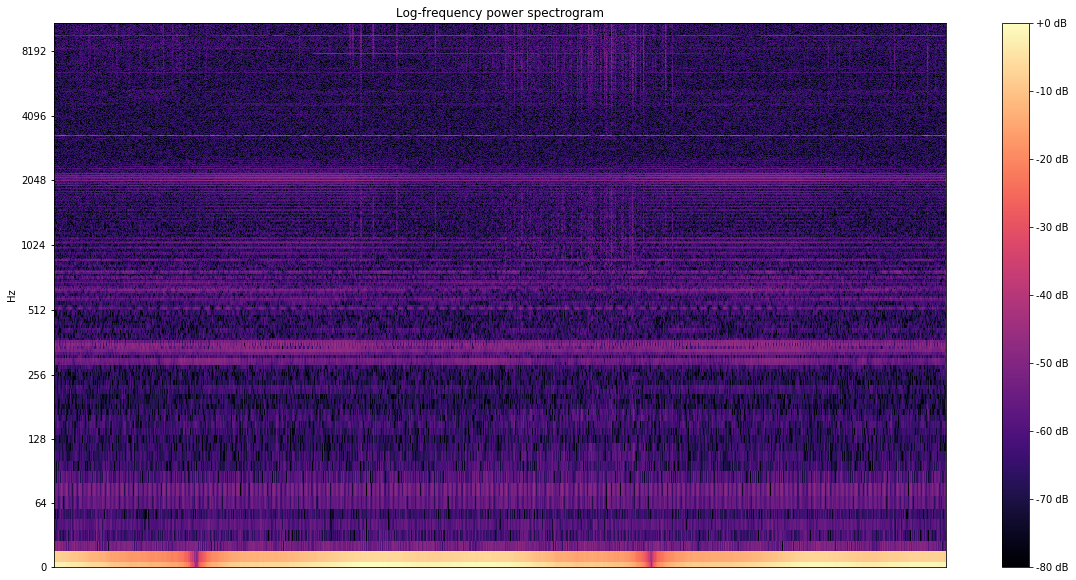

In [16]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(s0)), ref=np.max)
plt.figure(figsize=(20,10))

display.specshow(D, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')


Text(0.5, 1.0, 'Log-frequency power spectrogram')

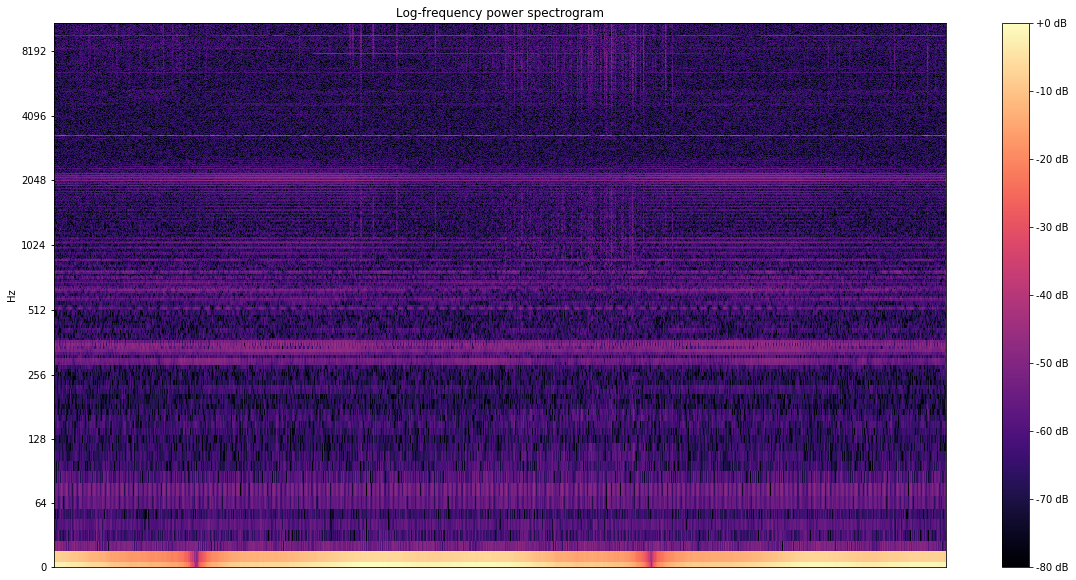

In [18]:
D3 = librosa.amplitude_to_db(np.abs(librosa.stft(s3)), ref=np.max)
plt.figure(figsize=(20,10))

display.specshow(D3, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')


In [91]:
librosa.

module